In [24]:
import random, math, os
import numpy as np
import matplotlib
import pylab
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

In [25]:
%matplotlib inline

In [26]:
#padding on the y axis between label and axis
plt.rcParams['ytick.major.pad']='10'

dpi_out = 400
fig_width = 3.39
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches
MAX_HEIGHT_INCHES = 8.0
if fig_height > MAX_HEIGHT_INCHES:
    print("WARNING: fig_height too large:" + fig_height + 
          "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
    fig_height = MAX_HEIGHT_INCHES
#fig, ax = plt.subplots(figsize = (fig_width, fig_height), dpi=400, frameon=True)
small_tick_size = 8
small_label_size = 8

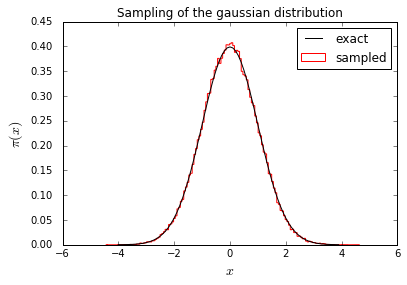

In [27]:
def gauss_test(sigma):
    phi = random.uniform(0.0, 2.0 * math.pi)
    Upsilon = random.uniform(0.0, 1.0)
    Psi = - math.log(Upsilon)
    r = sigma * math.sqrt(2.0 * Psi)
    x = r * math.cos(phi)
    y = r * math.sin(phi)
    return [x, y]

# exact distrubution:
list_x = [i * 0.1 for i in xrange(-40, 40)]
list_y = [math.exp(- x ** 2 / 2.0) / (math.sqrt(2.0 * math.pi)) for x in list_x]
# sampled distribution:
n_sampled_pairs = 50000
data = []
for sample in xrange(n_sampled_pairs):
        data += gauss_test(1.0)
# graphics output
pylab.plot(list_x, list_y, color='k', label='exact')
pylab.hist(data, bins=150, normed=True, color='r', histtype='step', label='sampled')
pylab.legend()
pylab.title('Sampling of the gaussian distribution')
pylab.xlabel('$x$', fontsize=14)
pylab.ylabel('$\pi(x)$', fontsize=14)
pylab.savefig('plot-gauss_test.png')

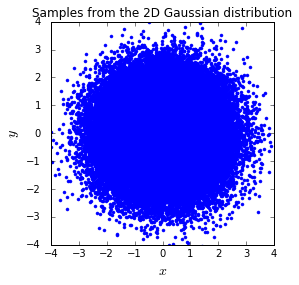

In [28]:
nsamples = 100000
x_list, y_list = [], []
for sample in range(nsamples):
    x_list.append(random.gauss(0.0, 1.0))
    y_list.append(random.gauss(0.0, 1.0))
# begin graphics output
pylab.plot(x_list, y_list, marker='.', linestyle='')
pylab.title('Samples from the 2D Gaussian distribution')
pylab.xlabel('$x$', fontsize=14)
pylab.ylabel('$y$', fontsize=14)
pylab.xlim(-4.0, 4.0)
pylab.ylim(-4.0, 4.0)
pylab.axes().set_aspect('equal') # set the aspect ratio of the plot
pylab.savefig('plot-gauss_2d.png')

<IPython.core.display.Javascript object>


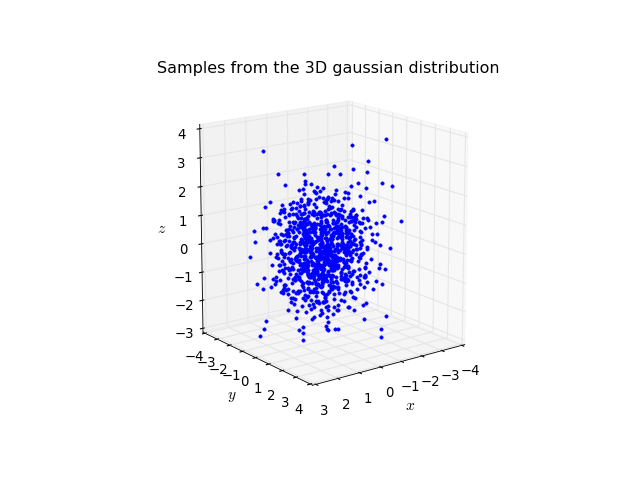

In [29]:
%matplotlib notebook
x_list, y_list, z_list = [], [], []
nsamples = 1000
for sample in xrange(nsamples):
    x_list.append(random.gauss(0.0, 1.0))
    y_list.append(random.gauss(0.0, 1.0))
    z_list.append(random.gauss(0.0, 1.0))
# begin graphics output
fig = pylab.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('equal') # set the aspect ratio of the plot
pylab.plot(x_list, y_list, z_list, '.')
pylab.title('Samples from the 3D gaussian distribution')
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
ax.set_zlabel('$z$', fontsize=14)
pylab.show()

<IPython.core.display.Javascript object>


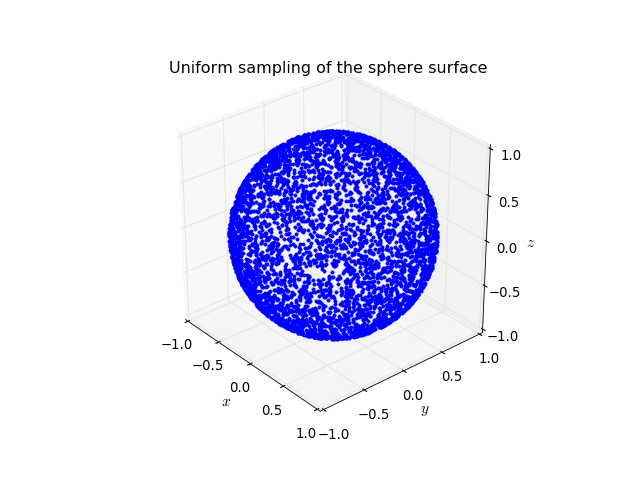

In [30]:
x_list, y_list, z_list = [],[],[]
nsamples = 5000
for sample in xrange(nsamples):
    x, y, z = random.gauss(0.0, 1.0), random.gauss(0.0, 1.0), random.gauss(0.0, 1.0)
    radius = math.sqrt(x ** 2 + y ** 2 + z ** 2)
    x_list.append(x / radius)
    y_list.append(y / radius)
    z_list.append(z / radius)
# graphics output
fig = pylab.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
pylab.plot(x_list, y_list, z_list, '.')
pylab.title('Uniform sampling of the sphere surface')
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
ax.set_zlabel('$z$', fontsize=14)
pylab.show()

<IPython.core.display.Javascript object>


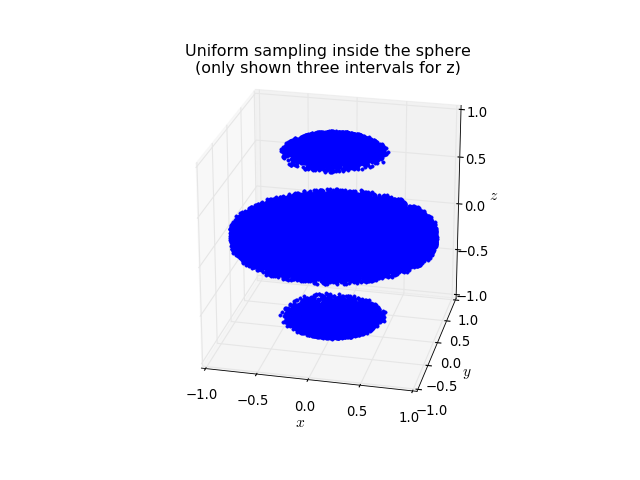

In [31]:
x_list, y_list, z_list = [],[],[]
nsamples = 200000
for sample in xrange(nsamples):
    x, y, z = random.gauss(0.0, 1.0), random.gauss(0.0, 1.0), random.gauss(0.0, 1.0)
    length = random.uniform(0.0, 1.0) ** (1.0 / 3.0) / math.sqrt(x ** 2 + y ** 2 + z ** 2)
    x, y, z = x * length, y * length, z * length
    if z < 0.075 and z > -0.075 or z > 0.85 or z < -0.85:
        x_list.append(x)
        y_list.append(y)
        z_list.append(z)
# graphics output
fig = pylab.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
pylab.title('Uniform sampling inside the sphere\n(only shown three intervals for z)')
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
ax.set_zlabel('$z$', fontsize=14)
pylab.plot(x_list, y_list, z_list, '.')
pylab.show()


In [32]:
def wall_time(pos_a, vel_a, sigma):
    if vel_a > 0.0:
        del_t = (1.0 - sigma - pos_a) / vel_a
    elif vel_a < 0.0:
        del_t = (pos_a - sigma) / abs(vel_a)
    else:
        del_t = float('inf')
    return del_t

def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]]
    del_x_sq = del_x[0] ** 2 + del_x[1] ** 2
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    del_v_sq = del_v[0] ** 2 + del_v[1] ** 2
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1]
    Upsilon = scal ** 2 - del_v_sq * ( del_x_sq - 4.0 * sigma **2)
    if Upsilon > 0.0 and scal < 0.0:
        del_t = - (scal + math.sqrt(Upsilon)) / del_v_sq
    else:
        del_t = float('inf')
    return del_t

pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
vel = [[0.21, 0.12], [0.71, 0.18], [-0.003, -0.79], [0.78, 0.1177]]
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
sigma = 0.15
t = 0.0
n_events = 1000000
all_vels = []
for event in range(n_events):
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l  in singles]
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
    next_event = min(wall_times + pair_times)
    t += next_event
    for k, l in singles: pos[k][l] += vel[k][l] * next_event 
    if min(wall_times) < min(pair_times):
        collision_disk, direction = singles[wall_times.index(next_event)]
        vel[collision_disk][direction] *= -1.0
    else: 
        a, b = pairs[pair_times.index(next_event)]
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
        abs_x = math.sqrt(del_x[0] ** 2 + del_x[1] ** 2)
        e_perp = [c / abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        for k in range(2): 
            vel[a][k] += e_perp[k] * scal 
            vel[b][k] -= e_perp[k] * scal 
    all_vels.append(vel[0][0])

In [33]:
ekin = 0.0
for elem in vel:
    ekin += elem[0]**2 + elem[1]**2
sigma = np.sqrt(ekin / 4.0)
all_vels = np.array(all_vels) / sigma

<IPython.core.display.Javascript object>


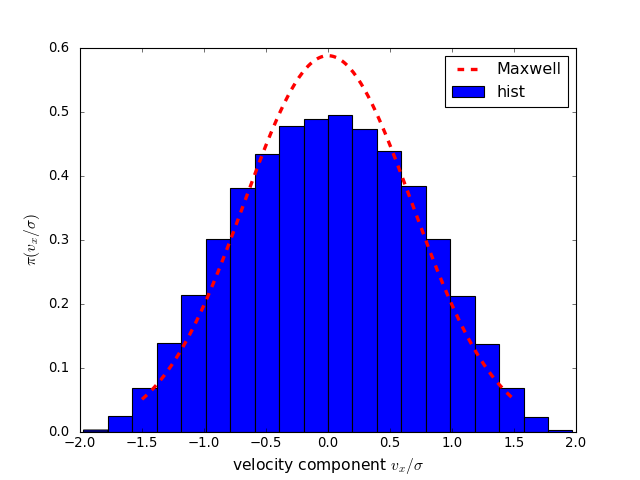

In [34]:
x_vals = np.linspace(-1.5, 1.5, num=200)
y_vals = (1/(sigma * np.sqrt(2 * math.pi))) * np.exp(-x_vals**2 / (2 * sigma**2))

pylab.xlabel('velocity component $v_x / \sigma$', fontsize=14)
pylab.ylabel('$\pi(v_x / \sigma)$', fontsize=14)
#pylab.title('Density of %i clothes-pins ($\sigma$=%s) on a line of length L=%s' % (N, sigma, L))
pylab.hist(all_vels, bins=20, normed=True, label='hist')
pylab.plot(x_vals, y_vals, color='r', lw=3, ls='--', label='Maxwell')
pylab.legend()
pylab.savefig('single_component_dist.pdf')
pylab.show()

In [10]:
def wall_time(pos_a, vel_a, sigma):
    if vel_a > 0.0:
        del_t = (1.0 - sigma - pos_a) / vel_a
    elif vel_a < 0.0:
        del_t = (pos_a - sigma) / abs(vel_a)
    else:
        del_t = float('inf')
    return del_t

def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]]
    del_x_sq = del_x[0] ** 2 + del_x[1] ** 2
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    del_v_sq = del_v[0] ** 2 + del_v[1] ** 2
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1]
    Upsilon = scal ** 2 - del_v_sq * ( del_x_sq - 4.0 * sigma **2)
    if Upsilon > 0.0 and scal < 0.0:
        del_t = - (scal + math.sqrt(Upsilon)) / del_v_sq
    else:
        del_t = float('inf')
    return del_t

pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
vel = [[0.21, 0.12], [0.71, 0.18], [-0.003, -0.79], [0.78, 0.1177]]
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
sigma = 0.15
t = 0.0
n_events = 1000000
all_vels = []
for event in range(n_events):
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l  in singles]
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
    next_event = min(wall_times + pair_times)
    t += next_event
    for k, l in singles: pos[k][l] += vel[k][l] * next_event 
    if min(wall_times) < min(pair_times):
        collision_disk, direction = singles[wall_times.index(next_event)]
        vel[collision_disk][direction] *= -1.0
    else: 
        a, b = pairs[pair_times.index(next_event)]
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
        abs_x = math.sqrt(del_x[0] ** 2 + del_x[1] ** 2)
        e_perp = [c / abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        for k in range(2): 
            vel[a][k] += e_perp[k] * scal 
            vel[b][k] -= e_perp[k] * scal 
    all_vels.append(vel[0][0])